# Week 7 Python Codes (More on Text Analytics)

## Gensim: NLP Toolkit  ( Gensim = Generate Similar)
https://radimrehurek.com/gensim/intro.html

**Topic Modeling**: Gensim facilitates the extraction of underlying themes or topics from document collections using techniques like Latent Dirichlet Allocation (LDA) and others.

**Document Similarity**: Gensim can quantify the similarity between two documents, aiding tasks such as plagiarism detection or discovering related articles.

**Word Embeddings**: Gensim enables the training of models like Word2Vec to create numerical representations of words, capturing their semantic meaning.

**Document Indexing and Retrieval**: Build systems with Gensim for efficient search through large text collections to retrieve relevant information.
**Models**
* Word2Vec: Neural network model for learning word embeddings, capturing semantic relationships; implemented in Gensim for training or loading pre-trained models.
* KeyedVectors: Utility class in Gensim for working with word vectors, offering methods for querying, manipulating, and analyzing word embeddings generated by models like Word2Vec.

## SpaCy Package: space-efficient natural language processing in Python
https://spacy.io/models/en
- **spaCy Models Overview**:
  - Pre-trained NLP models for English language tasks.
  - Tasks include Named Entity Recognition (NER), Part-of-Speech Tagging (POS), Dependency Parsing, and Text Classification.

- **Supported Tasks**:
  - Named Entity Recognition (NER): Identifying and classifying entities like people, organizations, locations, dates, and times.
  - Part-of-Speech Tagging (POS): Assigning tags (e.g., noun, verb, adjective) to words.
  - Dependency Parsing: Analyzing grammatical relationships between words.
  - Text Classification: Categorizing text into different classes.

- **Types of spaCy Pretrained Models**: Pretrained models are trained on large datasets before use, allowing them to perform tasks without additional training. In NLP, they understand language patterns and are useful for tasks like text classification. They offer a ready-made solution, saving time and resources.
  - `en_core_web_sm`: Small model, balances speed and accuracy. ( ~ 20k words)
  - `en_core_web_md`: Medium-sized model, more accurate but slower than small model. ( 50k words)
  - `en_core_web_lg`: Large model, most accurate but slowest. ( ~ 1 million words/non-words)
  - `en_core_web_trf`: Large model based on transformer architecture, highly effective for NLP tasks.


# Installations: Run these one at a time from anaconda terminal.

pip install gensim  
pip install spacy  
python -m spacy download en_core_web_sm  
python -m spacy download en_core_web_md  
python -m spacy download en_core_web_lg  
python -m spacy download en_core_web_trf

In [1]:
import gensim
import spacy
import en_core_web_sm, en_core_web_md, en_core_web_lg, en_core_web_trf

### Traditional vectorizers (e.g., CountVectorizer, TF-IDFVectorizer) create sparse vectors based on word frequencies or TF-IDF scores. SpaCy models produce dense vectors capturing semantic information about words and their contexts.

In [2]:
# Load the spacy model. This takes a few seconds.
import numpy as np
nlp1 = en_core_web_sm.load()
nlp2 = en_core_web_md.load()
nlp3 = en_core_web_lg.load()
#nlp4 = en_core_web_trf.load()
# Process words using the model
text = "Advanced Business Analytics"
doc1 = nlp1(text)
doc1.vector

array([-0.49961698, -0.17972898,  0.40265822,  0.76067466, -0.16856007,
       -0.42178082, -0.17766112,  1.0359637 ,  0.24377687, -0.17102925,
        0.41105303,  0.74013996, -0.79579014, -0.8736615 , -1.0318695 ,
       -0.18339135, -0.46333385, -0.16207546,  0.01497642, -0.6678998 ,
       -0.628082  , -0.40186867,  0.02220984,  0.14967571,  0.37319517,
        0.53116363,  0.8739703 ,  0.48383737,  0.6125091 ,  0.6337003 ,
       -0.6333334 , -1.0114967 , -0.20804298,  0.797967  , -0.5368201 ,
        0.4079419 ,  0.6618134 , -0.02647054, -0.89120644, -0.32335567,
       -0.99327374,  0.49907088, -0.3171494 ,  1.0975178 , -0.36020878,
        0.29511932, -0.25208354, -0.54237956,  0.2511318 , -0.2404301 ,
       -0.66840935,  1.6995945 ,  0.63907427, -0.90650445, -0.47561753,
        0.3748    , -0.07676242, -0.0240906 ,  0.74218917, -0.12605222,
       -0.50170726, -0.381404  , -0.7040882 , -0.6355444 , -0.04819528,
       -0.26934174,  0.96164274,  1.2446023 , -0.08943973, -1.09

In [3]:
nlp2(text).vector

array([ 7.18566656e-01, -2.20062327e+00,  2.74287319e+00,  3.10783315e+00,
        1.12070024e-01, -3.55699986e-01,  1.95466638e-01,  2.80169994e-01,
       -3.10029984e+00, -7.57780015e-01,  3.87523341e+00,  1.49211991e+00,
       -4.28169966e+00,  4.19998646e-01, -1.06281006e+00,  2.59527326e+00,
        5.14333344e+00,  8.49893332e-01, -2.72344685e+00,  4.50416617e-02,
        2.29700003e-02,  2.14400005e+00, -4.70366687e-01,  2.51469994e+00,
        9.34466660e-01, -8.40746641e-01, -1.35976660e+00, -1.30503666e+00,
       -3.45717259e-02,  1.56446016e+00,  1.09833670e+00,  2.40059996e+00,
        5.45113385e-01, -2.51916677e-01,  5.60739994e-01, -1.21833658e+00,
        4.24430037e+00,  1.23926677e-01,  5.97733319e-01, -9.79796648e-01,
        6.62933290e-01,  7.37301493e-03, -3.99920011e+00,  1.84041345e+00,
       -5.01043367e+00,  7.15779960e-01,  1.89526999e+00, -1.52081001e+00,
        1.75066340e+00, -3.89106655e+00, -4.33177382e-01,  2.28503346e+00,
       -2.43473339e+00, -

In [4]:
nlp3(text).vector

array([ 7.18566656e-01, -2.20062327e+00,  2.74287319e+00,  3.10783315e+00,
        1.12070024e-01, -3.55699986e-01,  1.95466638e-01,  2.80169994e-01,
       -3.10029984e+00, -7.57780015e-01,  3.87523341e+00,  1.49211991e+00,
       -4.28169966e+00,  4.19998646e-01, -1.06281006e+00,  2.59527326e+00,
        5.14333344e+00,  8.49893332e-01, -2.72344685e+00,  4.50416617e-02,
        2.29700003e-02,  2.14400005e+00, -4.70366687e-01,  2.51469994e+00,
        9.34466660e-01, -8.40746641e-01, -1.35976660e+00, -1.30503666e+00,
       -3.45717259e-02,  1.56446016e+00,  1.09833670e+00,  2.40059996e+00,
        5.45113385e-01, -2.51916677e-01,  5.60739994e-01, -1.21833658e+00,
        4.24430037e+00,  1.23926677e-01,  5.97733319e-01, -9.79796648e-01,
        6.62933290e-01,  7.37301493e-03, -3.99920011e+00,  1.84041345e+00,
       -5.01043367e+00,  7.15779960e-01,  1.89526999e+00, -1.52081001e+00,
        1.75066340e+00, -3.89106655e+00, -4.33177382e-01,  2.28503346e+00,
       -2.43473339e+00, -

In [5]:
import pandas as pd
df = pd.read_csv("spamtext.csv")
messages = "".join(df.Message)
doc = nlp3(messages)
enttext = [ent.text  for ent in doc.ents]
entlabel = [ent.label_  for ent in doc.ents]
data = pd.DataFrame([enttext, entlabel]) 
data = data.transpose() # To Transpose and make each rows as columns
data.columns = ['entity_text', 'entity_label'] # Rename the columns
data.head()

,entity_text,entity_label
0,bugis n,GPE
1,2,CARDINAL
2,wkly,ORG
3,FA Cup,EVENT
4,FA to 87121,CARDINAL


In [6]:
data.entity_label.value_counts()

entity_label
CARDINAL       1717
PERSON         1453
ORG            1277
DATE            794
GPE             368
MONEY           282
TIME            261
PRODUCT         115
ORDINAL         110
NORP            108
WORK_OF_ART      89
QUANTITY         59
EVENT            28
LOC              26
FAC              23
LAW              11
PERCENT           9
LANGUAGE          6
Name: count, dtype: int64

## Entities
| Label    | Description                |
|----------|----------------------------|
| PERSON   | People, including fictional characters and groups of people       |
| NORP     | Nationalities, religious and political groups                      |
| FAC      | Buildings, airports, highways, bridges, etc.                      |
| ORG      | Companies, agencies, institutions, etc.                           |
| GPE      | Countries, cities, states                                   |
| LOC      | Non-GPE locations, mountain ranges, bodies of water           |
| PRODUCT  | Objects, vehicles, foods, etc.                               |
| EVENT    | Named hurricanes, battles, wars, sports events, etc.          |
| WORK_OF_ART | Titles of books, songs, etc.                                |
| LAW      | Named documents made into laws.                               |
| LANGUAGE | Any named language.                                           |
| DATE     | Absolute or relative dates or periods.                         |
| TIME     | Times smaller than a day.                                      |
| PERCENT  | Percentage, including "%".                                     |
| MONEY    | Monetary values, including unit.                               |
| QUANTITY | Measurements, as of weight or distance.                         |
| ORDINAL  | "first", "second", etc.                                       |
| CARDINAL | Numerals that do not fall under another type.                   |


In [7]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.Category[0]

'ham'

In [9]:
word_embeddings = []
for message in df["Message"]:
    doc = nlp3(message)
    # Extract the vector for each token in the message
    message_embedding = [token.vector for token in doc]
    # Average the token vectors to obtain a single vector for the entire message
    averaged_embedding = sum(message_embedding) / len(message_embedding)
    word_embeddings.append(averaged_embedding)

# Add the word embeddings as a new column in the DataFrame
df["Word_Embeddings"] = word_embeddings
df.head()

,Category,Message,Word_Embeddings
0,ham,"Go until jurong point, crazy.. Available only ...","[0.8000099, 0.9535963, -0.34847602, -0.3791346..."
1,ham,Ok lar... Joking wif u oni...,"[0.16232497, 0.8551012, -0.7290775, -0.6373049..."
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[-0.739487, 0.5289012, -0.13894223, -0.0169310..."
3,ham,U dun say so early hor... U c already then say...,"[-1.8170546, 2.02302, 1.0373635, -1.0052722, 1..."
4,ham,"Nah I don't think he goes to usf, he lives aro...","[0.18221398, 4.2482843, -3.2048604, -1.1110712..."


In [10]:
# YOu can use the values to create columns and use them for al kinds of ML jobs.
[len(x) for x in df.Word_Embeddings[:10]]

[300, 300, 300, 300, 300, 300, 300, 300, 300, 300]

In [11]:
from sklearn.metrics.pairwise import cosine_similarity
# Function to calculate semantic similarity between pairs of text
def calculate_similarity(text1, text2):
    doc1 = nlp3(text1)
    doc2 = nlp3(text2)
    # Compute the average word vectors for each document
    vec1 = np.mean([token.vector for token in doc1], axis=0)
    vec2 = np.mean([token.vector for token in doc2], axis=0)
    # Calculate cosine similarity between the vectors
    similarity = cosine_similarity([vec1], [vec2])[0][0]
    return similarity
calculate_similarity(df.Message[0], df.Message[1])

0.6215931

## Hugging Face
Hugging Face is a leading company and community in the field of natural language processing (NLP) and artificial intelligence (AI). They develop and maintain open-source libraries and tools, including Transformers, Datasets, and Tokenizers, which empower researchers, developers, and practitioners to work with state-of-the-art NLP models effectively. Through their Model Hub and vibrant community, Hugging Face provides access to thousands of pre-trained models, fosters collaboration, and democratizes access to NLP technologies. Their contributions play a significant role in advancing NLP research, development, and deployment, making complex NLP tasks more accessible and achievable for a wide range of users worldwide.
### Text Datasets from Hugging Face Library:
1. **AG News**: News articles categorized into four classes: World, Sports, Business, and Science/Technology.
2. **IMDb**: Movie reviews labeled as positive or negative sentiment.
3. **SST-2**: Sentiment analysis dataset containing sentences from movie reviews labeled as positive or negative.
4. **SQuAD**: Stanford Question Answering Dataset for reading comprehension.
5. **MultiNLI**: Multi-Genre Natural Language Inference Corpus for textual entailment.
6. **CoNLL 2003**: Named Entity Recognition (NER) dataset containing labeled entities in English and German news articles.
7. **WikiText**: Wikipedia-based language modeling dataset.
8. **WMT14**: Translation dataset from English to German.
9. **COCO**: Common Objects in Context dataset for image captioning.

### Audio Datasets:
1. **Common Voice**: Multilingual collection of transcribed voice data for speech recognition.
2. **LibriSpeech**: ASR (Automatic Speech Recognition) dataset derived from audiobooks.

### Computer Vision Datasets:
1. **CIFAR-10/100**: Image classification datasets containing 10 or 100 classes of images.
2. **MNIST**: Handwritten digit recognition dataset.
3. **Oxford-IIIT Pet**: Dataset for fine-grained classification of pet breeds.

### Other Datasets:
1. **Hugging Face Hub**: Various datasets contributed by the community, including medical datasets, conversational datasets, and more.
2. **Open Images**: Dataset containing millions of annotated images across thousands of classes.


### Download google pretrained model here.
https://www.kaggle.com/datasets/leadbest/googlenewsvectorsnegative300

In [12]:
# Importing necessary libraries
from gensim.models import KeyedVectors

# Path to the pretrained Word2Vec model file
pretrained_path = "GoogleNews-vectors-negative300.bin"

# Loading the pretrained Word2Vec model using KeyedVectors
# Note: This model is in binary format, so binary parameter is set to True
w2v_model = KeyedVectors.load_word2vec_format(pretrained_path, binary=True)

# Now the w2v_model contains the pretrained Word2Vec model
# You can use this model to perform various operations such as word similarity, word analogy, etc.


In [13]:
w2v_model.similarity('woman', 'man')

0.76640123

In [14]:
import pandas as pd
words = ["Man", "Woman", "King", "Queen", "Prince", "Princes"]
similarities = np.zeros((len(words), len(words)), dtype=np.float_)
for idx1, word1 in enumerate(words):
    for idx2, word2 in enumerate(words):
        sim = w2v_model.similarity(word1, word2)
        similarities[idx1, idx2] = sim       
df = pd.DataFrame.from_records(similarities, columns=words)
df.index = words

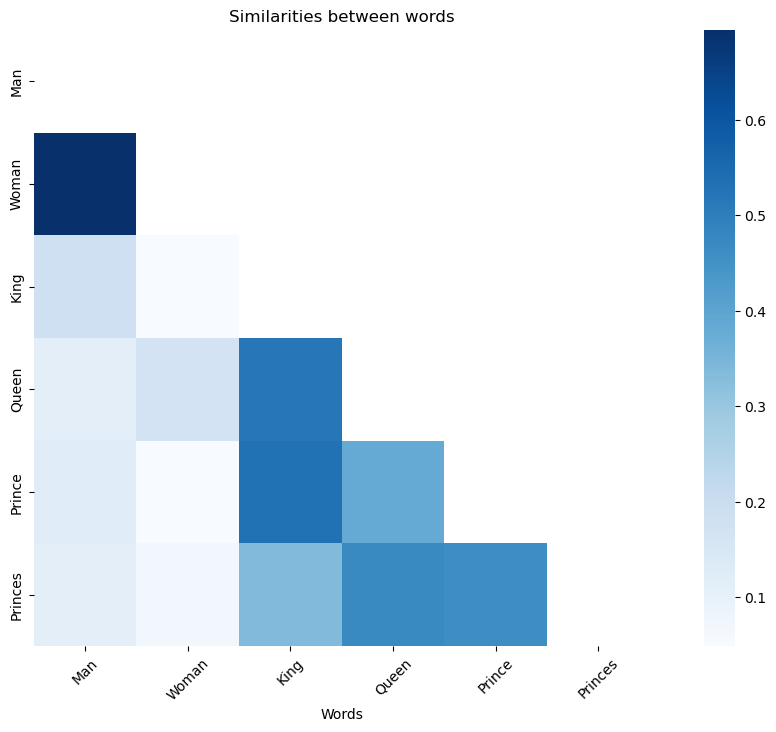

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax=plt.subplots(1, 1, figsize=(14,8))
cmap = plt.cm.Blues
mask = np.zeros_like(df)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df, cmap=cmap, mask=mask, square=True, ax=ax)
_=plt.yticks(rotation=90)
plt.xlabel('Words')
_=plt.xticks(rotation=45)
_=plt.title("Similarities between words")

In [16]:
w2v_model.most_similar('beautiful')

[('gorgeous', 0.8353004455566406),
 ('lovely', 0.8106936812400818),
 ('stunningly_beautiful', 0.7329413294792175),
 ('breathtakingly_beautiful', 0.7231340408325195),
 ('wonderful', 0.6854086518287659),
 ('fabulous', 0.6700063943862915),
 ('loveliest', 0.6612577438354492),
 ('prettiest', 0.6595001816749573),
 ('beatiful', 0.6593325138092041),
 ('magnificent', 0.6591402888298035)]

In [17]:
w2v_model.most_similar('analytics')

[('predictive_analytics', 0.7625154852867126),
 ('analytic', 0.7440863847732544),
 ('analytic_tools', 0.7267764210700989),
 ('analytic_capabilities', 0.6889407634735107),
 ('Analytics', 0.678624153137207),
 ('predictive_analytic', 0.6438511610031128),
 ('predictive_modeling', 0.6413614749908447),
 ('dashboarding', 0.631067156791687),
 ('ad_hoc_query', 0.6261212229728699),
 ('Text_Analytics', 0.6192393898963928)]

In [18]:
w2v_model.most_similar('learning')

[('teaching', 0.6601868271827698),
 ('learn', 0.6365275979042053),
 ('Learning', 0.6208058595657349),
 ('reteaching', 0.580967366695404),
 ('learner_centered', 0.5738571286201477),
 ('emergent_literacy', 0.5706571936607361),
 ('teach', 0.5704741477966309),
 ('kinesthetic_learning', 0.5656599402427673),
 ('learners', 0.5508514046669006),
 ('learing', 0.5438815355300903)]

In [19]:
w2v_model.most_similar('god')

[('gods', 0.7856108546257019),
 ('deity', 0.7325143218040466),
 ('God', 0.666293203830719),
 ('diety', 0.6607768535614014),
 ('goddess', 0.6518734693527222),
 ('deities', 0.6512717604637146),
 ('lord', 0.6350281238555908),
 ('god_Zeus', 0.6218456625938416),
 ('Almighty', 0.6040672063827515),
 ('Gods', 0.6037754416465759)]

In [20]:
w2v_model.most_similar('woman')

[('man', 0.7664012908935547),
 ('girl', 0.7494640946388245),
 ('teenage_girl', 0.7336829900741577),
 ('teenager', 0.631708562374115),
 ('lady', 0.6288785934448242),
 ('teenaged_girl', 0.6141783595085144),
 ('mother', 0.6076306104660034),
 ('policewoman', 0.6069462895393372),
 ('boy', 0.5975909233093262),
 ('Woman', 0.5770983099937439)]

In [21]:
import os

# Set the Gensim data directory to './models'
os.environ['GENSIM_DATA_DIR'] = './models'

In [22]:
import gensim.downloader as api

# Get information about available models and datasets
info_df = pd.DataFrame.from_dict(api.info()['models'], orient='index')

# Display selected columns of the DataFrame
info_df[['file_size', 'base_dataset', 'parameters']].head(5)


,file_size,base_dataset,parameters
fasttext-wiki-news-subwords-300,1.005007e+09,"Wikipedia 2017, UMBC webbase corpus and statmt...",{'dimension': 300}
conceptnet-numberbatch-17-06-300,1.225498e+09,"ConceptNet, word2vec, GloVe, and OpenSubtitles...",{'dimension': 300}
word2vec-ruscorpora-300,2.084274e+08,Russian National Corpus (about 250M words),"{'dimension': 300, 'window_size': 10}"
word2vec-google-news-300,1.743564e+09,Google News (about 100 billion words),{'dimension': 300}
glove-wiki-gigaword-50,6.918254e+07,"Wikipedia 2014 + Gigaword 5 (6B tokens, uncased)",{'dimension': 50}


In [23]:
# full list of columns
info_df.head(3)

,num_records,file_size,base_dataset,reader_code,license,parameters,description,read_more,checksum,file_name,parts,preprocessing
fasttext-wiki-news-subwords-300,999999.0,1.005007e+09,"Wikipedia 2017, UMBC webbase corpus and statmt...",https://github.com/RaRe-Technologies/gensim-da...,https://creativecommons.org/licenses/by-sa/3.0/,{'dimension': 300},1 million word vectors trained on Wikipedia 20...,[https://fasttext.cc/docs/en/english-vectors.h...,de2bb3a20c46ce65c9c131e1ad9a77af,fasttext-wiki-news-subwords-300.gz,1,NaN
conceptnet-numberbatch-17-06-300,1917247.0,1.225498e+09,"ConceptNet, word2vec, GloVe, and OpenSubtitles...",https://github.com/RaRe-Technologies/gensim-da...,https://github.com/commonsense/conceptnet-numb...,{'dimension': 300},ConceptNet Numberbatch consists of state-of-th...,[http://aaai.org/ocs/index.php/AAAI/AAAI17/pap...,fd642d457adcd0ea94da0cd21b150847,conceptnet-numberbatch-17-06-300.gz,1,NaN
word2vec-ruscorpora-300,184973.0,2.084274e+08,Russian National Corpus (about 250M words),https://github.com/RaRe-Technologies/gensim-da...,https://creativecommons.org/licenses/by/4.0/de...,"{'dimension': 300, 'window_size': 10}",Word2vec Continuous Skipgram vectors trained o...,[https://www.academia.edu/24306935/WebVectors_...,9bdebdc8ae6d17d20839dd9b5af10bc4,word2vec-ruscorpora-300.gz,1,The corpus was lemmatized and tagged with Univ...


In [24]:
pd.options.display.float_format = '{:.2f}'.format

In [25]:
model = api.load("glove-wiki-gigaword-50")

## Similarity Queries


In [26]:
%precision 2

'%.2f'

In [27]:
v_king = model['king']
v_queen = model['queen']

print("Vector size:", model.vector_size)
print("v_king  =", v_king[:10])
print("v_queen =", v_queen[:10])
print("similarity:", model.similarity('king', 'queen'))

Vector size: 50
v_king  = [ 0.5   0.69 -0.6  -0.02  0.6  -0.13 -0.09  0.47 -0.62 -0.31]
v_queen = [ 0.38  1.82 -1.26 -0.1   0.36  0.6  -0.18  0.84 -0.06 -0.76]
similarity: 0.7839044


In [28]:
%precision 3

'%.3f'

In [29]:
model.most_similar('king', topn=3)

[('prince', 0.824), ('queen', 0.784), ('ii', 0.775)]

In [30]:
v_lion = model['lion']
v_nano = model['nanotechnology']

model.cosine_similarities(v_king, [v_queen, v_lion, v_nano])

array([ 0.784,  0.478, -0.255], dtype=float32)

In [31]:
model.most_similar(positive=['woman', 'king'], negative=['man'], topn=3)

[('queen', 0.852), ('throne', 0.766), ('prince', 0.759)]

In [32]:
model.most_similar(positive=['paris', 'germany'], negative=['france'], topn=3)

[('berlin', 0.920), ('frankfurt', 0.820), ('vienna', 0.818)]

In [33]:
model.most_similar(positive=['france', 'capital'], topn=1)

[('paris', 0.784)]

In [34]:
model.most_similar(positive=['greece', 'capital'], topn=3)

[('central', 0.797), ('western', 0.757), ('region', 0.750)]

# Book Example 6.7.3 step by step

In [35]:
import warnings
warnings.filterwarnings('ignore')

import os
import gzip
from collections import Counter
from pprint import pprint

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt 


import string
import nltk
from nltk.corpus import stopwords  
from nltk.text import TextCollection
from nltk.collocations import BigramCollocationFinder
from nltk.metrics.association import BigramAssocMeasures
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
import sklearn
from sklearn.metrics.pairwise import cosine_similarity
%matplotlib inline

In [36]:
c1 = "Human machine interface for Lab ABC computer applications"
c2 = "A survey of user opinion of computer system response time"
c3 = "The EPS user interface management system"
c4 = "System and human system engineering testing of EPS"
c5 = "Relation of user-perceived response time to error measurement"
m1 = "The generation of random, binary, unordered trees"
m2 = "The intersection graph of paths in trees"
m3 = "Graph minors IV: Widths of trees and well-quasi-ordering"
m4 = "Graph minors: A survey"
terms = ['human', 'interface', 'computer', 'user', 'system', 'response', 'time', 'eps', 'survey', 
         'trees', 'graph', 'minors']
data = pd.DataFrame()
data['docs'] = ["c1", "c2", "c3", "c4", "c5", "m1", "m2", "m3", "m4"]
data['content'] = [c1, c2, c3, c4, c5, m1, m2, m3, m4]
data

,docs,content
0,c1,Human machine interface for Lab ABC computer a...
1,c2,A survey of user opinion of computer system re...
2,c3,The EPS user interface management system
3,c4,System and human system engineering testing of...
4,c5,Relation of user-perceived response time to er...
5,m1,"The generation of random, binary, unordered trees"
6,m2,The intersection graph of paths in trees
7,m3,Graph minors IV: Widths of trees and well-quas...
8,m4,Graph minors: A survey


In [38]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()  
vectors = vect.fit_transform(data.content)
td = pd.DataFrame(vectors.todense())  
td.columns = vect.get_feature_names_out()
term_document_matrix = td.T
term_document_matrix.columns = ["c1", "c2", "c3", "c4", "c5", "m1", "m2", "m3", "m4"]
term_document_matrix['total_count'] = term_document_matrix.sum(axis=1)
tdmatrix = term_document_matrix.drop(columns=['total_count'])
tdmatrix

,c1,c2,c3,c4,c5,m1,m2,m3,m4
abc,1,0,0,0,0,0,0,0,0
and,0,0,0,1,0,0,0,1,0
applications,1,0,0,0,0,0,0,0,0
binary,0,0,0,0,0,1,0,0,0
computer,1,1,0,0,0,0,0,0,0
engineering,0,0,0,1,0,0,0,0,0
eps,0,0,1,1,0,0,0,0,0
error,0,0,0,0,1,0,0,0,0
for,1,0,0,0,0,0,0,0,0
generation,0,0,0,0,0,1,0,0,0


In [39]:
print(terms)

['human', 'interface', 'computer', 'user', 'system', 'response', 'time', 'eps', 'survey', 'trees', 'graph', 'minors']


In [40]:
docmatrix = tdmatrix.loc[tdmatrix.index.isin(terms)] # Filter the given terms
docmatrix = docmatrix.loc[terms] # Order by the terms
docmatrix

,c1,c2,c3,c4,c5,m1,m2,m3,m4
human,1,0,0,1,0,0,0,0,0
interface,1,0,1,0,0,0,0,0,0
computer,1,1,0,0,0,0,0,0,0
user,0,1,1,0,1,0,0,0,0
system,0,1,1,2,0,0,0,0,0
response,0,1,0,0,1,0,0,0,0
time,0,1,0,0,1,0,0,0,0
eps,0,0,1,1,0,0,0,0,0
survey,0,1,0,0,0,0,0,0,1
trees,0,0,0,0,0,1,1,1,0


In [41]:
docmatrix.columns

Index(['c1', 'c2', 'c3', 'c4', 'c5', 'm1', 'm2', 'm3', 'm4'], dtype='object')

In [42]:
A = docmatrix[['c1', 'c2', 'c3', 'c4', 'c5', 'm1', 'm2', 'm3', 'm4']]
A

,c1,c2,c3,c4,c5,m1,m2,m3,m4
human,1,0,0,1,0,0,0,0,0
interface,1,0,1,0,0,0,0,0,0
computer,1,1,0,0,0,0,0,0,0
user,0,1,1,0,1,0,0,0,0
system,0,1,1,2,0,0,0,0,0
response,0,1,0,0,1,0,0,0,0
time,0,1,0,0,1,0,0,0,0
eps,0,0,1,1,0,0,0,0,0
survey,0,1,0,0,0,0,0,0,1
trees,0,0,0,0,0,1,1,1,0


In [43]:
cosine_similarity(A, A)

array([[1.   , 0.5  , 0.5  , 0.   , 0.577, 0.   , 0.   , 0.5  , 0.   ,
        0.   , 0.   , 0.   ],
       [0.5  , 1.   , 0.5  , 0.408, 0.289, 0.   , 0.   , 0.5  , 0.   ,
        0.   , 0.   , 0.   ],
       [0.5  , 0.5  , 1.   , 0.408, 0.289, 0.5  , 0.5  , 0.   , 0.5  ,
        0.   , 0.   , 0.   ],
       [0.   , 0.408, 0.408, 1.   , 0.471, 0.816, 0.816, 0.408, 0.408,
        0.   , 0.   , 0.   ],
       [0.577, 0.289, 0.289, 0.471, 1.   , 0.289, 0.289, 0.866, 0.289,
        0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.5  , 0.816, 0.289, 1.   , 1.   , 0.   , 0.5  ,
        0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.5  , 0.816, 0.289, 1.   , 1.   , 0.   , 0.5  ,
        0.   , 0.   , 0.   ],
       [0.5  , 0.5  , 0.   , 0.408, 0.866, 0.   , 0.   , 1.   , 0.   ,
        0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.5  , 0.408, 0.289, 0.5  , 0.5  , 0.   , 1.   ,
        0.   , 0.408, 0.5  ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        1.   , 0.667

In [44]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

In [45]:
# SVD
U, sigma, Vt = np.linalg.svd(A)
print("U =", U)

U = [[-0.221 -0.113 0.289 0.415 0.106 0.341 -0.523 -0.060 0.407 -0.076 0.323
  -0.055]
 [-0.198 -0.072 0.135 0.552 -0.282 -0.496 0.070 -0.010 0.109 -0.034
  -0.456 -0.284]
 [-0.240 0.043 -0.164 0.595 0.107 0.255 0.302 0.062 -0.492 0.110 0.134
  0.339]
 [-0.404 0.057 -0.338 -0.099 -0.332 -0.385 -0.003 -0.000 -0.012 -0.152
  0.645 -0.110]
 [-0.644 -0.167 0.361 -0.333 0.159 0.207 0.166 0.034 -0.271 -0.110 -0.134
  -0.339]
 [-0.265 0.107 -0.426 -0.074 -0.080 0.170 -0.283 -0.016 0.054 -0.575
  -0.432 0.309]
 [-0.265 0.107 -0.426 -0.074 -0.080 0.170 -0.283 -0.016 0.054 0.727
  -0.213 -0.199]
 [-0.301 -0.141 0.330 -0.188 -0.115 -0.272 -0.033 -0.019 0.165 0.295
  -0.055 0.734]
 [-0.206 0.274 -0.178 0.032 0.537 -0.081 0.467 -0.036 0.579 -0.000 0.000
  0.000]
 [-0.013 0.490 0.231 -0.025 -0.594 0.392 0.288 0.255 0.225 -0.000 0.000
  0.000]
 [-0.036 0.623 0.223 -0.001 0.068 -0.115 -0.160 -0.681 -0.232 -0.000
  -0.000 -0.000]
 [-0.032 0.451 0.141 0.009 0.300 -0.277 -0.339 0.678 -0.183 0.000 0.000
 

In [46]:
print("Vt =", Vt)

Vt = [[-0.197 -0.606 -0.463 -0.542 -0.279 -0.004 -0.015 -0.024 -0.082]
 [-0.056 0.166 -0.127 -0.232 0.107 0.193 0.438 0.615 0.530]
 [0.110 -0.497 0.208 0.570 -0.505 0.098 0.193 0.253 0.079]
 [0.950 0.029 -0.042 -0.268 -0.150 -0.015 -0.016 -0.010 0.025]
 [-0.046 0.206 -0.378 0.206 -0.327 -0.395 -0.349 -0.150 0.602]
 [0.077 0.256 -0.724 0.369 -0.035 0.300 0.212 -0.000 -0.362]
 [-0.177 0.433 0.237 -0.265 -0.672 0.341 0.152 -0.249 -0.038]
 [-0.014 0.049 0.009 -0.019 -0.058 0.454 -0.762 0.450 -0.070]
 [0.064 -0.243 -0.024 0.084 0.262 0.620 -0.018 -0.520 0.454]]


In [47]:
print("sigma =", sigma)

sigma = [3.341 2.542 2.354 1.645 1.505 1.306 0.846 0.560 0.364]


In [48]:
# k = 2
sigmak = np.diag(sigma[:2])
sigmak

array([[3.341, 0.000],
       [0.000, 2.542]])

In [49]:
Uk = U[:, :2] 
Uk

array([[-0.221, -0.113],
       [-0.198, -0.072],
       [-0.240, 0.043],
       [-0.404, 0.057],
       [-0.644, -0.167],
       [-0.265, 0.107],
       [-0.265, 0.107],
       [-0.301, -0.141],
       [-0.206, 0.274],
       [-0.013, 0.490],
       [-0.036, 0.623],
       [-0.032, 0.451]])

In [50]:
Vtk = Vt[:2, :]
Vtk

array([[-0.197, -0.606, -0.463, -0.542, -0.279, -0.004, -0.015, -0.024,
        -0.082],
       [-0.056, 0.166, -0.127, -0.232, 0.107, 0.193, 0.438, 0.615, 0.530]])

In [51]:
Ak = np.dot(Uk, np.dot(sigmak, Vtk))
Ak

array([[0.162, 0.400, 0.379, 0.468, 0.176, -0.053, -0.115, -0.159,
        -0.092],
       [0.141, 0.370, 0.329, 0.400, 0.165, -0.033, -0.071, -0.097,
        -0.043],
       [0.152, 0.505, 0.358, 0.410, 0.236, 0.024, 0.060, 0.087, 0.124],
       [0.258, 0.841, 0.606, 0.697, 0.392, 0.033, 0.083, 0.122, 0.187],
       [0.449, 1.234, 1.051, 1.266, 0.556, -0.074, -0.155, -0.210,
        -0.049],
       [0.160, 0.582, 0.375, 0.417, 0.277, 0.056, 0.132, 0.189, 0.217],
       [0.160, 0.582, 0.375, 0.417, 0.277, 0.056, 0.132, 0.189, 0.217],
       [0.218, 0.550, 0.511, 0.628, 0.243, -0.065, -0.143, -0.197,
        -0.108],
       [0.097, 0.532, 0.230, 0.212, 0.267, 0.137, 0.315, 0.444, 0.425],
       [-0.061, 0.232, -0.139, -0.266, 0.145, 0.240, 0.546, 0.767, 0.664],
       [-0.065, 0.335, -0.146, -0.301, 0.203, 0.306, 0.695, 0.977, 0.849],
       [-0.043, 0.254, -0.097, -0.208, 0.152, 0.221, 0.503, 0.707, 0.616]])

In [52]:
terms

['human',
 'interface',
 'computer',
 'user',
 'system',
 'response',
 'time',
 'eps',
 'survey',
 'trees',
 'graph',
 'minors']

In [53]:
qtext = ["user", "interface"]
qlist = [1 if x in qtext else 0 for x in terms]
q = np.array(qlist).T
q

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [54]:
# sigmak inverse
inv_sigmak = np.linalg.inv(sigmak)
inv_sigmak

array([[0.299, 0.000],
       [0.000, 0.393]])

In [55]:
# Now get qk
qk = np.dot(q, np.dot(Uk, inv_sigmak)).reshape(1,2)
qk.shape

(1, 2)

In [56]:
Vtk.shape[1]

9

In [57]:
scores = cosine_similarity(qk, Vtk.reshape(9,2))
np.sort(scores) 

array([[-0.779, -0.772, -0.433, 0.341, 0.546, 0.674, 0.844, 0.894, 1.000]])

# Networks

In [58]:
# keep this function

def draw_graph(G, show_names=False, node_size=1, font_size=10, edge_width=0.5): 

    import numpy as np
    import networkx as nx
    
    from IPython.display import SVG 
    from sknetwork.visualization import svg_graph 
    from sknetwork.data import Bunch 
    from sknetwork.ranking import PageRank 

    adjacency = nx.to_scipy_sparse_matrix(G, nodelist=None, dtype=None, weight='weight', format='csr') 

    names = np.array(list(G.nodes())) 

    graph = Bunch() 
    graph.adjacency = adjacency 
    graph.names = np.array(names) 

    pagerank = PageRank() 

    scores = pagerank.fit_transform(adjacency) 

    if show_names: 
        
        image = svg_graph(graph.adjacency, font_size=font_size, node_size=node_size, names=graph.names, width=700, height=500, scores=scores, edge_width=edge_width) 

    else: 

        image = svg_graph(graph.adjacency, node_size=node_size, width=700, height=500, scores = scores, edge_width=edge_width) 

    return SVG(image) 

In [59]:
#AI genrated text about AI
ai_history = """Artificial Intelligence (AI) is the field of computer science focused on creating intelligent 
machines that can perform tasks that typically require human intelligence. The term "artificial intelligence" 
was first coined in 1956 at a conference at Dartmouth College by John McCarthy and his colleagues.

Throughout the 1960s and 1970s, AI research advanced rapidly, with the development of new algorithms and models, 
including the perceptron, which could learn to recognize patterns in data, and the backpropagation algorithm, 
which could be used to train neural networks.

In the 21st century, advances in computing power, data storage, and machine learning algorithms have reinvigorated 
the field of AI. Deep neural networks, which can learn to recognize complex patterns in data, have proved highly 
effective for tasks like image recognition, speech recognition, and language translation. AI is being used in a 
wide range of applications, from self-driving cars to virtual assistants to medical diagnosis tools.

However, one of the biggest challenges facing AI today is the problem of bias. Because AI algorithms learn from 
the data they are trained on, they can sometimes produce biased results if that data is biased in some way. 
Researchers are working to develop new algorithms and techniques that can help identify and mitigate bias in 
AI systems.

Overall, AI is a rapidly evolving field with a promising future. As AI continues to advance, it has the potential 
to revolutionize many aspects of our lives, from healthcare to education to transportation. It is important that 
we remain vigilant and proactive in addressing the challenges and risks associated with this powerful technology."""

# Network Analysis  with NetworkX 

In [62]:
# Importing the networkx library and aliasing it as nx
import networkx as nx

# Generating the Les Misérables graph using the built-in function les_miserables_graph() in networkx
G = nx.les_miserables_graph()

# Sorting the nodes of the Les Misérables graph and selecting the first 10 nodes
# The sorted() function is used to sort the nodes alphabetically
# The nodes are represented as strings, so sorting them alphabetically gives a sorted list
first_10_nodes = sorted(G.nodes())[0:10]

# Printing the first 10 nodes of the Les Misérables graph
print(first_10_nodes)

['Anzelma', 'Babet', 'Bahorel', 'Bamatabois', 'BaronessT', 'Blacheville', 'Bossuet', 'Boulatruelle', 'Brevet', 'Brujon']


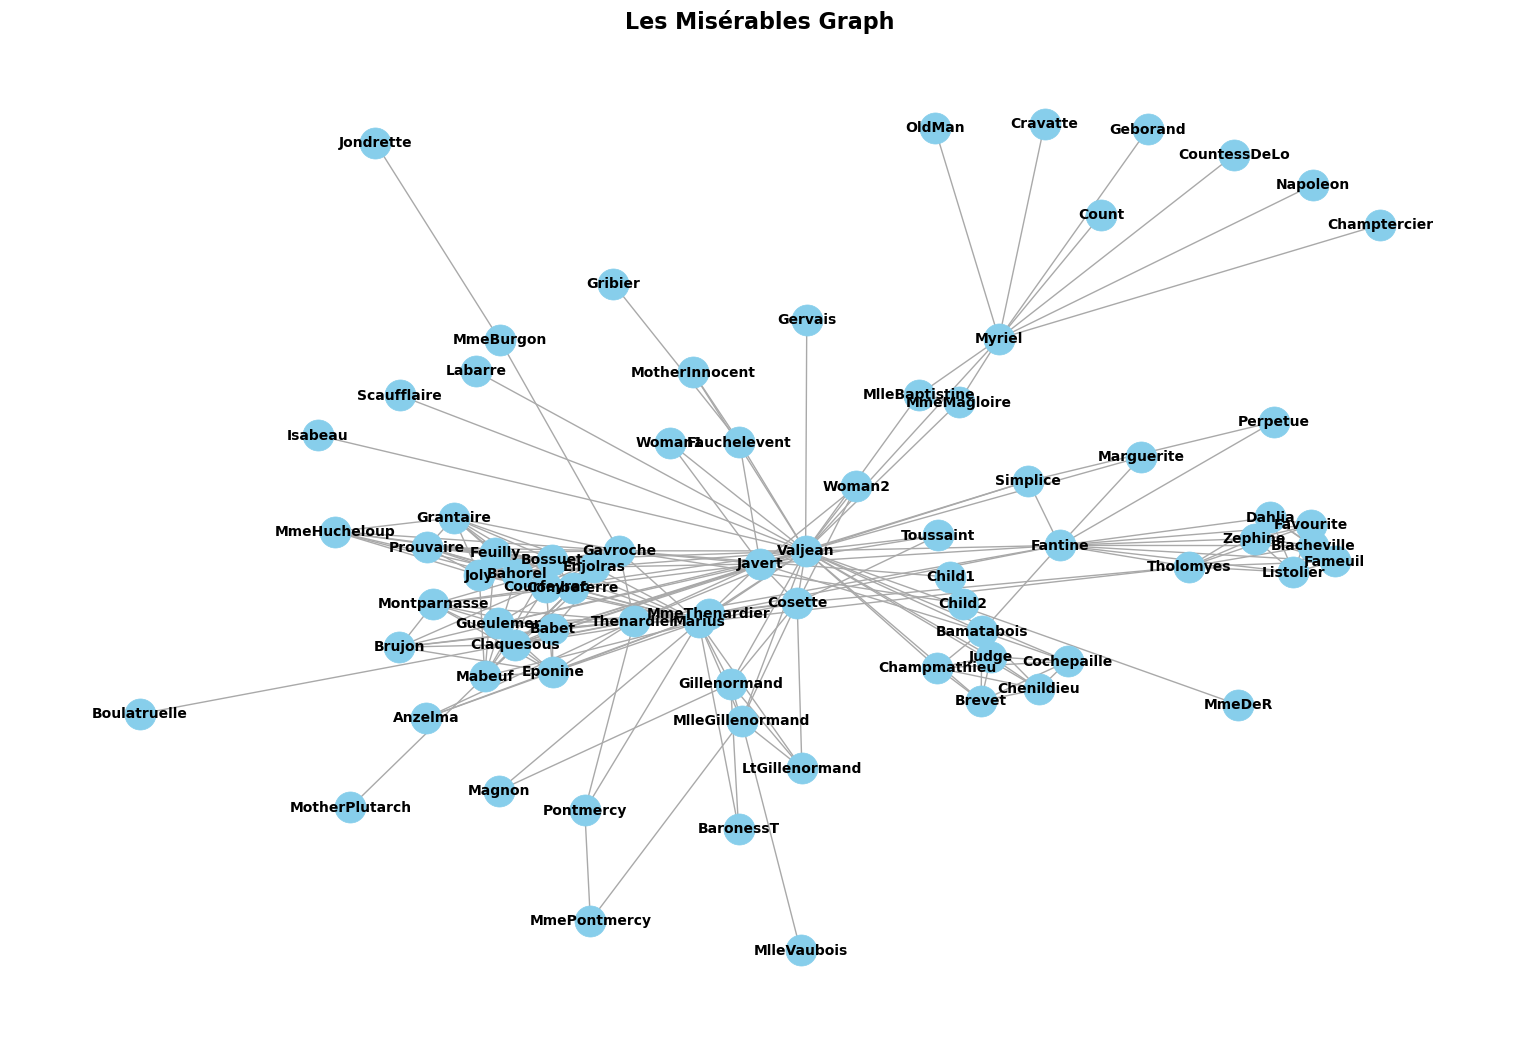

In [64]:
# Importing the necessary libraries
import networkx as nx
import matplotlib.pyplot as plt

# Set the figure size and create a layout for the graph
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G)

# Draw the Les Misérables graph with customized colors and styles
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=500, edge_color='darkgray', linewidths=0.5, font_size=10, font_color='black', font_weight='bold')

# Add a title to the plot
plt.title("Les Misérables Graph", fontsize=16, fontweight='bold')

# Show the plot
plt.show()


In [71]:
# Get the edges of the Les Misérables graph
edges = G.edges()

# Convert the edges to a DataFrame
df = pd.DataFrame(edges, columns=['source', 'target'])

# Display the DataFrame
print("DataFrame of source and target nodes:")
df.head()

DataFrame of source and target nodes:


,source,target
0,Napoleon,Myriel
1,Myriel,MlleBaptistine
2,Myriel,MmeMagloire
3,Myriel,CountessDeLo
4,Myriel,Geborand


In [69]:
# Calculate the degree centrality of each node
degree_centrality = nx.degree_centrality(G)

# Sort the nodes based on their degree centrality scores in descending order
sorted_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

# Get the IDs of the top 10 central actors
top_10_actors = [node[0] for node in sorted_nodes[:10]]

# Print the IDs of the top 10 central actors
print("Top 10 central actors with the most connections:")
print(top_10_actors)

Top 10 central actors with the most connections:
['Valjean', 'Gavroche', 'Marius', 'Javert', 'Thenardier', 'Fantine', 'Enjolras', 'Courfeyrac', 'Bossuet', 'Bahorel']


In [73]:
# Step 1: Create a list of IDs with 20 or fewer connections
low_degree_ids = [node for node, degree in G.degree() if degree <= 10]

# Step 2: Filter the DataFrame to exclude rows with IDs in low_degree_ids
filtered_df = df[~df['source'].isin(low_degree_ids) & ~df['target'].isin(low_degree_ids)]

# Step 3: Display the shape and value counts of id_1 from the filtered dataset
print("Shape of filtered dataset:", filtered_df.shape)
print("\nValue counts of source from the filtered dataset:")
print(filtered_df['source'].value_counts())


Shape of filtered dataset: (73, 2)

Value counts of source from the filtered dataset:
source
Valjean          9
Gavroche         9
Marius           8
Mabeuf           7
Enjolras         6
Thenardier       5
Combeferre       5
MmeThenardier    4
Feuilly          4
Fantine          3
Eponine          3
Courfeyrac       3
Cosette          2
Javert           2
Bahorel          2
Bossuet          1
Name: count, dtype: int64


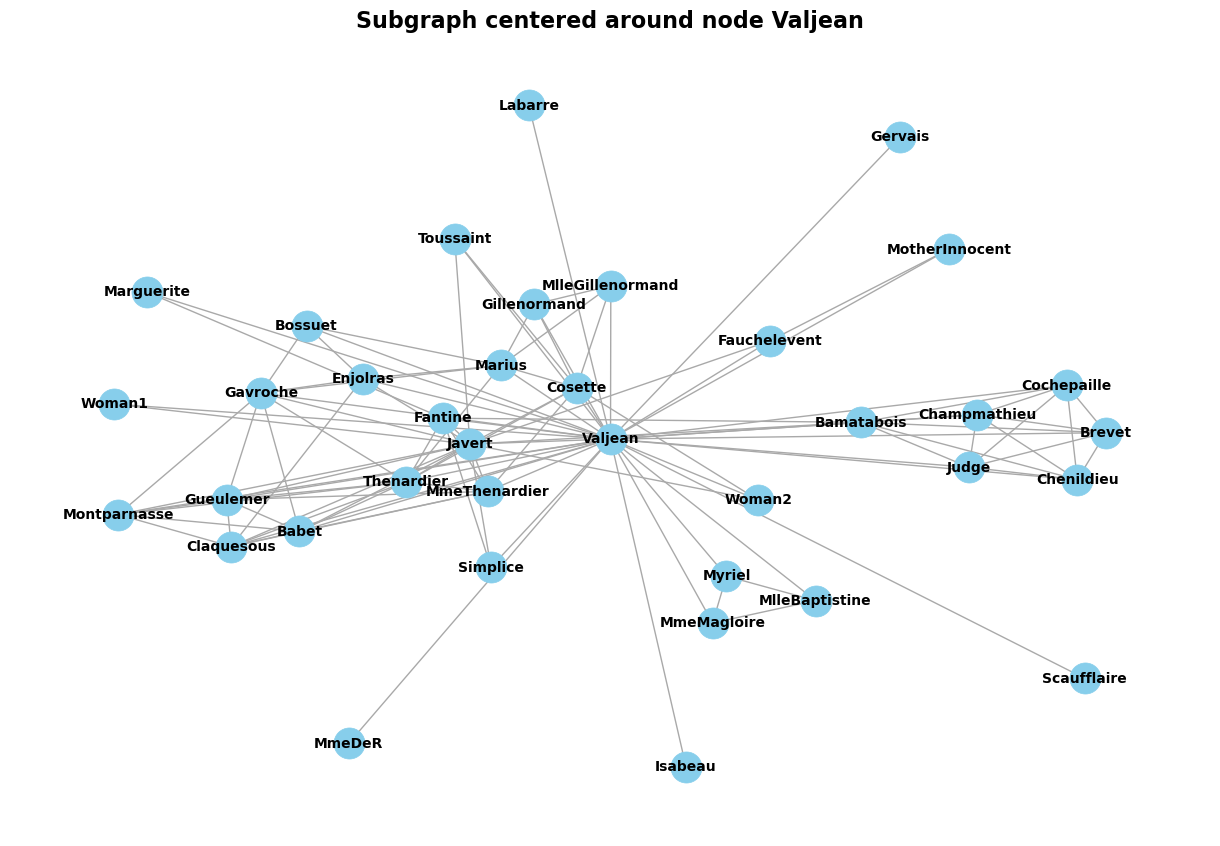

In [74]:

# Identify the node with the highest number of connections (either as source or target)
highest_degree_node = df['source'].value_counts().idxmax()  # Change 'source' to 'target' if needed

# Create a subgraph centered around the highest degree node
subgraph = nx.ego_graph(G, highest_degree_node)

# Set the figure size and create a layout for the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(subgraph)

# Draw the subgraph with appropriate labels
nx.draw(subgraph, pos, with_labels=True, node_color='skyblue', node_size=500, edge_color='darkgray', linewidths=0.5, font_size=10, font_color='black', font_weight='bold')

# Add a title to the plot
plt.title(f"Subgraph centered around node {highest_degree_node}", fontsize=16, fontweight='bold')

# Show the plot
plt.show()


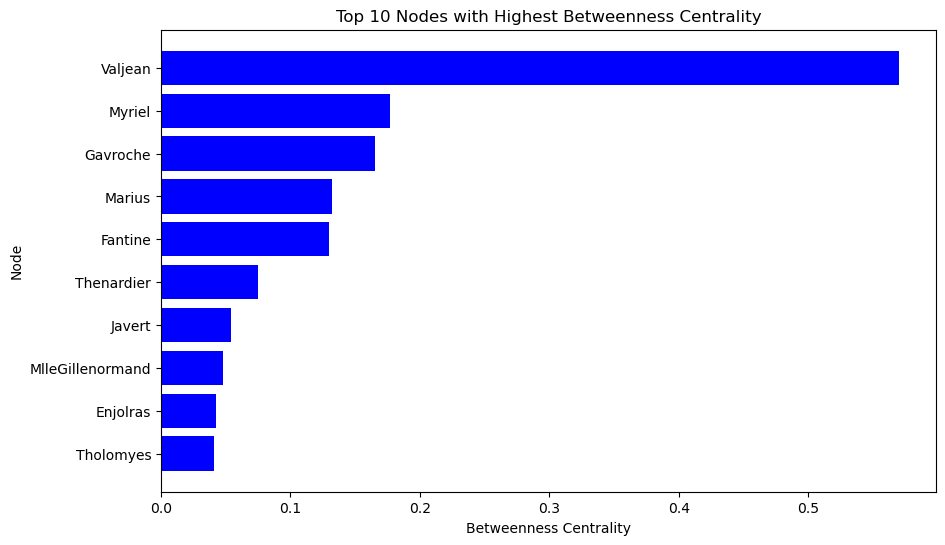

In [77]:
# Calculate the betweenness centrality of each node (either as source or target)
betweenness_centrality = nx.betweenness_centrality(G)  # Change G to the appropriate graph object

# Sort the nodes based on their betweenness centrality scores in descending order
sorted_nodes = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)

# Extract the top 10 nodes with the highest betweenness centrality scores
top_10_nodes = sorted_nodes[:10]

# Extract the node labels (either as source or target) and their corresponding betweenness centrality scores
node_labels = [node[0] for node in top_10_nodes]
centrality_scores = [node[1] for node in top_10_nodes]

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.barh(node_labels, centrality_scores, color='blue')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Node')
plt.title('Top 10 Nodes with Highest Betweenness Centrality')
plt.gca().invert_yaxis()  # Invert y-axis to display nodes with highest centrality at the top
plt.show()